In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import statistics as stat
import csv
import talib

## 1.  資料匯入

In [4]:
data = pd.read_csv("data_adjclose.csv", index_col=0 )
data.index = pd.to_datetime(data.index)
tickers = [i for i in data]
data.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-03,8.096329,13.960760,12.801544,13.128471,16.048155,13.164283,7.563420,31.394938,34.714676,23.648851,12.573286,7.905364,22.997406,18.841242,12.727464,12.706832,15.704612,19.919771,87.991096
2005-01-04,7.953772,13.361337,12.427669,12.766636,15.686164,12.901708,7.380638,30.679733,34.135559,23.001278,12.389185,7.771184,22.141087,18.481796,12.408527,12.307665,15.347388,19.554167,86.931953
2005-01-05,7.983264,13.245315,12.263162,12.476211,15.706274,12.908807,7.216763,30.840042,34.103386,23.157021,12.307363,7.916544,21.539658,18.379864,12.402509,12.307665,15.281234,19.565247,86.406013
2005-01-06,7.998014,13.129302,12.195864,12.490494,15.666056,12.915905,7.286095,30.815371,34.103386,22.771757,12.341455,8.061905,20.906729,18.465704,12.426581,12.322451,15.268003,19.554167,86.756622
2005-01-07,7.988182,13.309770,12.165953,12.378614,15.619126,12.830743,7.210459,30.494770,33.910339,22.706182,12.205086,7.950090,21.018419,18.068705,12.276138,12.085903,15.148928,19.576326,86.595924


In [5]:
returns = (data - data.shift(1)) / data.shift(1)

## 2. 兩種觀點下的long-short portfolio

### 技術指標1：KD值

In [6]:
from talib import abstract
print(abstract.STOCH)

STOCH([input_arrays], [fastk_period=5], [slowk_period=3], [slowk_matype=0], [slowd_period=3], [slowd_matype=0])

Stochastic (Momentum Indicators)

Inputs:
    prices: ['high', 'low', 'close']
Parameters:
    fastk_period: 5
    slowk_period: 3
    slowk_matype: 0
    slowd_period: 3
    slowd_matype: 0
Outputs:
    slowk
    slowd


In [7]:
#匯入最高價、最低價、收盤價(未調整)資料
high = pd.read_csv("data_high.csv", index_col=0 )
high.index = pd.to_datetime(high.index)

low = pd.read_csv("data_low.csv", index_col=0 )
low.index = pd.to_datetime(low.index)

close = pd.read_csv("data_close.csv", index_col=0 )
close.index = pd.to_datetime(close.index)

<b> (1) 計算KD值

In [8]:
def etf2pd(etf):
    etf_pd = pd.DataFrame(index=data.index)
    etf_pd["high"] = high[etf]
    etf_pd["low"] = low[etf]
    etf_pd["close"] = close[etf]
    return etf_pd

In [9]:
#K-D>0:買進；K-D<0:賣出
kd = pd.DataFrame()
for i in tickers:
    tmp_kd = abstract.STOCH(etf2pd(i), fastk_period=9, slowk_period=3,slowd_period=3).fillna(value=0).asfreq("BM")
    comp_kd = tmp_kd["slowk"] - tmp_kd["slowd"]   #series
    kd[i] = comp_kd

kd.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,-3.338964,-0.162854,4.506110,0.503149,0.893168,-1.930519,0.348465,9.273940,1.416509,-2.959619,4.241357,-0.042129,6.323115,13.200215,-0.793644,-3.950624,12.480977,2.546269,7.477616
2005-02-28,4.878163,-2.096977,0.076048,6.505569,5.543672,5.047259,6.766467,25.811234,13.823652,0.721753,-0.494303,-7.904937,-4.673174,6.864821,-1.799052,4.755436,19.232478,0.087080,19.084277
2005-03-31,2.398714,10.437846,11.434428,1.974395,4.517123,7.941814,10.893262,21.839255,-0.484985,4.586761,4.999536,2.778969,11.590073,1.940132,6.046458,4.122102,7.657972,3.289232,15.067370
2005-04-29,1.045494,-16.857158,-16.381040,2.165434,-2.706236,-0.461393,1.984389,-7.495883,6.743607,-12.590413,4.230564,7.642495,-12.758694,-1.795630,-16.295002,-7.810257,7.139965,-5.198736,3.016979
2005-05-31,-2.684381,-5.305669,0.174024,22.470760,-3.939048,-6.468877,20.025550,14.809972,8.490022,-4.846244,-17.899387,-8.532076,-4.076305,-15.869585,-13.296115,-7.056060,15.569346,-13.970762,-4.133408


<b> (2) 定義函數：抓每個月KD前四和後四檔的ETF

In [10]:
def get_8_etf_kd(time):   #time: "y-m" ex."2005-1"   #output: 兩個list(long, short)
    temp_kd_set = kd[time]   #type: pd.dataframe
    monthly_kd_set = []   #每個月的etf排名及其kd值
    for j in range(temp_kd_set.shape[1]):   #df行數
        etf_kd = [tickers[j], temp_kd_set.iloc[0, j]]
        monthly_kd_set.append(etf_kd)
    monthly_kd_set.sort(key=lambda x: x[1], reverse=True)
    #print(monthly_kd_set)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_kd_set[:4]]
    short_4_etf = [l[0] for l in monthly_kd_set[-4:]]
    return long_4_etf, short_4_etf

<b> (3) 使用函數跑每月的權重與最終整體報酬率（period: 2005/1~2012/12)

In [11]:
weight_kd = pd.DataFrame(columns=tickers,index=kd.index).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_kd(time)
        for a in tmp_etf[0]:
            weight_kd.loc[time, a] = 0.25
        for b in tmp_etf[1]:
            weight_kd.loc[time, b] = -0.25

weight_kd.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,-0.25,0.00,0.00,0.00,0.0,-0.25,0.00,0.25,0.00,-0.25,0.00,0.00,0.00,0.25,0.00,-0.25,0.25,0.00,0.25
2005-02-28,0.00,-0.25,0.00,0.00,0.0,0.00,0.00,0.25,0.25,0.00,0.00,-0.25,-0.25,0.00,-0.25,0.00,0.25,0.00,0.25
2005-03-31,-0.25,0.00,0.25,-0.25,0.0,0.00,0.00,0.25,-0.25,0.00,0.00,0.00,0.25,-0.25,0.00,0.00,0.00,0.00,0.25
2005-04-29,0.00,-0.25,-0.25,0.00,0.0,0.00,0.00,0.00,0.25,0.00,0.25,0.25,-0.25,0.00,-0.25,0.00,0.25,0.00,0.00
2005-05-31,0.00,0.00,0.00,0.25,0.0,0.00,0.25,0.25,0.00,0.00,-0.25,0.00,0.00,-0.25,-0.25,0.00,0.25,-0.25,0.00


In [12]:
q_kd = []    #q1~q95
tmp_weight_kd = weight_kd.shift(1) #把前個月的權重換成下個月index，使ret_次月和weight_這個月配在一起
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            days = returns[time].shape[0]
            tmp_ret = returns[time].mean()*days    #series   #若沒有取mean,則為dataframe
            monthly_q_kd = float(tmp_weight_kd[time].dot(tmp_ret).to_numpy())
            q_kd.append(monthly_q_kd)
        else:
            pass
#print(len(q_kd))
print('KD mean:', stat.mean(q_kd))

KD mean: -0.004650217078917062


<b/> ➤以KD作為投資組合選擇指標建構long-short portfolio，則平均報酬率為-0.0224%。

### 技術指標2：指數移動平均線 EMA

<b> (1) 計算每日20日(短線)與35日(長線)的EMA差值，取每月月底MA數值作為預測。

In [13]:
ma = pd.DataFrame()
for i in tickers:
    ma[i] = talib.EMA(data[i], timeperiod=20) - talib.EMA(data[i], timeperiod=35)
monthly_ma = ma.asfreq("BM")

若為正數，即表示當日短均線超過長均線，為看漲的股票；反之則看跌。

<b> (2) 同上步驟，抓出每月long-short portfolio的資產分配權重，並試算出2005~2012年的整體報酬率。

In [14]:
def get_8_etf_ma(time):   #time: "y-m" ex."2014-1"   #output: 兩個list(long, short)
    temp_ma_set = monthly_ma[time]   #type: pd.dataframe
    monthly_ma_set = []   #每個月的etf排名及其ma值
    for j in range(temp_ma_set.shape[1]):   #df行數
        etf_ma = [tickers[j], temp_ma_set.iloc[0, j]]   #ix: label or index searching
        monthly_ma_set.append(etf_ma)
    monthly_ma_set.sort(key=lambda x: x[1], reverse=True)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_ma_set[:4]]
    short_4_etf = [l[0] for l in monthly_ma_set[-4:]]
    return long_4_etf, short_4_etf

In [15]:
weight_ma = pd.DataFrame(columns=tickers,index=pd.date_range('2005/1/1','2019/12/31', freq='BM')).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_ma(time)
        for a in tmp_etf[0]:
            weight_ma.loc[time, a] = 0.25
        for b in tmp_etf[1]:
            weight_ma.loc[time, b] = -0.25
            
weight_ma.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2005-01-31,0.25,0.25,0.25,0.25,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,-0.25,-0.25,-0.25,-0.25
2005-02-28,0.00,0.25,0.00,0.00,0.00,0.0,-0.25,0.00,-0.25,0.25,0.0,-0.25,0.25,0.0,-0.25,0.00,0.00,0.00,0.25
2005-03-31,0.00,0.00,0.25,0.00,0.25,0.0,0.00,0.25,-0.25,0.25,0.0,0.00,-0.25,0.0,0.00,0.00,-0.25,0.00,-0.25
2005-04-29,0.00,0.00,0.00,0.00,0.00,0.0,0.25,0.00,-0.25,-0.25,0.0,0.25,-0.25,0.0,0.25,0.25,0.00,0.00,-0.25
2005-05-31,0.00,0.25,0.00,0.00,0.00,0.0,0.00,-0.25,-0.25,0.25,0.0,0.00,-0.25,0.0,0.00,0.00,0.25,-0.25,0.25


In [16]:
q_ma = []    #q1~q95
tmp_weight_ma = weight_ma.shift(1)
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            days = returns[time].shape[0]
            tmp_ret = returns[time].mean()*days   #series   #若沒有取mean,則為dataframe
            monthly_q_ma = float(tmp_weight_ma[time].dot(tmp_ret).to_numpy())
            q_ma.append(monthly_q_ma)
        else:
            pass

print('EMA mean:', stat.mean(q_ma))

EMA mean: -0.003552180187424891


<b/> ➤以EMA作為投資組合選擇的指標，則平均報酬率為-0.0161%。

### 合併兩種view的估計資料

In [17]:
Q = np.array([
    [stat.mean(q_kd)],
    [stat.mean(q_ma)]
])
Q

array([[-0.00465022],
       [-0.00355218]])

In [18]:
omega = np.cov(np.stack((q_kd, q_ma), axis = 0)  )
print(omega) 

[[ 0.00088227 -0.00040813]
 [-0.00040813  0.00123793]]


## 3. 代入Blacklitterman Model (period2： 2013/1 ~ 2019/12)

<b> (1) 以KD與EMA作為技術指標，預測第二期的long-short portfolio權重

In [19]:
w_eq = np.array([
    [0.01797, 0.00554, 0.02888, 0.04935, 0.02994, 0.02390, 0.01081, 0.00598, 0.07510, 0.01466,
     0.01201, 0.00316, 0.00454, 0.00672, 0.00773, 0.03099, 0.01540, 0.04248, 0.61484]])
#每個月一個共變數矩陣sigma
tau = 0.05
delta = 3.37  #風險趨避係數
omega_inv = np.linalg.inv(omega)

In [20]:
#第二段區間的時間(2013/1~2019/12)
period_2 = []
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        period_2.append(time)

In [21]:
for time in period_2:
    tmp_etf = get_8_etf_kd(time)
    for a in tmp_etf[0]:
        weight_kd.loc[time, a] = 0.25
    for b in tmp_etf[1]:
        weight_kd.loc[time, b] = -0.25
        
weight_kd.tail()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2019-08-30,0.00,0.25,0.00,0.00,0.0,-0.25,-0.25,-0.25,0.00,0.0,0.00,0.25,0.25,-0.25,0.00,0.00,0.25,0.00,0.00
2019-09-30,-0.25,0.00,-0.25,0.00,0.0,0.00,0.00,0.25,-0.25,0.0,0.00,0.00,-0.25,0.25,0.00,0.25,0.00,0.25,0.00
2019-10-31,-0.25,0.00,0.00,-0.25,0.0,0.00,0.00,0.25,0.25,0.0,0.25,0.00,-0.25,-0.25,0.00,0.25,0.00,0.00,0.00
2019-11-29,0.25,0.00,0.25,-0.25,0.0,0.00,-0.25,0.00,0.00,0.0,0.25,0.00,-0.25,0.00,0.25,0.00,-0.25,0.00,0.00
2019-12-31,0.00,0.00,0.00,-0.25,0.0,0.00,0.25,-0.25,0.00,0.0,0.00,0.25,0.00,0.25,-0.25,0.00,0.25,0.00,-0.25


In [22]:
for time in period_2:
    tmp_etf = get_8_etf_ma(time)
    for a in tmp_etf[0]:
        weight_ma.loc[time, a] = 0.25
    for b in tmp_etf[1]:
        weight_ma.loc[time, b] = -0.25
        
weight_ma.tail()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2019-08-30,0.00,-0.25,0.25,0.0,0.0,0.0,0.00,0.0,0.00,-0.25,0.25,0.00,-0.25,0.00,0.0,0.25,0.25,0.0,-0.25
2019-09-30,0.00,-0.25,0.00,0.0,0.0,0.0,-0.25,0.0,0.25,0.25,0.00,-0.25,-0.25,0.00,0.0,0.00,0.25,0.0,0.25
2019-10-31,-0.25,0.00,-0.25,0.0,0.0,0.0,-0.25,0.0,0.25,0.25,0.00,-0.25,0.00,0.00,0.0,0.00,0.25,0.0,0.25
2019-11-29,-0.25,-0.25,0.00,0.0,0.0,0.0,-0.25,0.0,0.25,0.25,0.00,0.00,0.00,-0.25,0.0,0.00,0.25,0.0,0.25
2019-12-31,-0.25,0.25,-0.25,0.0,0.0,0.0,-0.25,0.0,0.00,0.25,0.00,-0.25,0.00,0.00,0.0,0.00,0.25,0.0,0.25


<b> (2) 代入Blacklitterman Model進行觀點調整，試算出每月最佳權重w*

In [23]:
# 每個月的P矩陣(技術指標權重)
def get_p_matrix(time):
    view1 = weight_kd[time].values.tolist()[0]
    view2 = weight_ma[time].values.tolist()[0]
    p = np.stack([view1, view2])   #matrix:2x19，type:ndarray
    return p  

In [24]:
def get_optimal_weight(time):
    P = get_p_matrix(time)
    sigma = returns[time].cov()
    A = omega/tau + (P.dot(sigma).dot(np.transpose(P))/(1+tau))
    A_inv = np.linalg.inv(A)   #反矩陣
    lmda = (omega_inv.dot(Q)*tau/delta) - A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(w_eq)) \
    - (A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(P)).dot(omega_inv).dot(Q))*(tau/delta)
    optimal_w = (1/(1+tau))*(w_eq + np.transpose(np.transpose(P).dot(lmda)))
    return optimal_w

In [25]:
# BL模型的optimal weight
w_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for time in period_2:
    opt_w = [get_optimal_weight(time)[0]]
    #print(len(opt_w))
    w_bl[time] = opt_w

w_bl.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,0.0171143,-0.0139904,0.0275048,0.000235997,0.0560117,0.0227619,0.0102952,0.0331927,0.0440264,0.0332285,0.0114381,-0.00522133,0.0235904,0.0146309,0.0073619,0.0295143,0.00643581,0.0404571,0.593793
2013-02-28,0.0432255,0.00527619,0.0275048,0.0390762,0.0285143,0.0227619,-0.0158159,0.0499938,0.0272252,0.0139619,0.0375493,0.00300952,0.0486224,0.0245874,-0.0108255,0.0113269,0.0146667,0.0404571,0.541263
2013-03-29,-0.029382,-0.0412201,-0.0189915,0.000503716,0.0285143,0.0227619,0.0102952,0.00569524,0.0715238,0.0139619,0.0114381,0.00300952,0.00432381,0.0064,0.0073619,0.0760106,0.061163,0.0869534,0.632058
2013-04-30,0.0171143,0.00527619,0.0187047,0.0657538,0.0285143,-0.00479203,0.0378492,0.0332492,0.05277,0.0602697,0.0114381,-0.0157443,-0.00447627,0.0064,-0.020192,0.0107604,0.0422206,0.0404571,0.566808
2013-05-31,0.0363459,0.0245078,0.0275048,0.0936215,0.0366724,0.0227619,0.037685,-0.0409262,0.0522922,-0.0134279,0.0114381,-0.0243803,-0.00383433,0.0064,0.0073619,0.0295143,0.0146667,0.0404571,0.59372


## 4. 模型投資組合績效比較

<b> (1) 投資組合報酬率比較

個別ETF報酬率比較：BL Model v.s. Equilibrium

In [26]:
# BL Model各資產每月報酬率
returns_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for time in period_2:
    days = returns[time].shape[0]
    r = np.array(returns[time].mean().values)*days
    w = w_bl[time].values
    tmp_ret_bl = r * w
    returns_bl[time] = tmp_ret_bl
        
returns_bl.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,0.000661143,-0.000214447,0.000461908,6.1659e-06,0.00177118,0.000932939,0.000457707,0.00185462,0.00103314,-0.00200453,0.000669338,-3.2754e-05,-0.00179625,0.000561367,0.000445588,0.00203964,-0.000100023,0.00119394,0.0298613
2013-02-28,0.00128567,-0.000150897,-0.00061649,-0.0023955,-0.000916825,-0.00089545,0.000123827,-0.00633687,0.000670824,0.000501826,-0.00256607,-2.2731e-05,-0.00124132,-0.00104795,-0.000120392,3.24589e-05,0.000137016,-0.00107963,0.00762258
2013-03-29,-0.000195383,0.000451914,-0.000200454,-2.60453e-05,-0.000280911,-0.000163423,-0.000137947,-0.000286733,0.00405467,-0.00051034,0.000200449,6.6422e-05,-3.58953e-05,-0.000335987,4.46408e-05,0.00163122,-0.000781712,0.00148158,0.0229766
2013-04-30,0.000692235,7.59086e-05,-0.000285555,0.0015686,0.00163897,-0.000201197,0.00120829,0.00371359,0.00434954,-0.000886519,0.000397909,-0.000542848,-4.16429e-05,0.000640764,-0.00043296,0.000423248,0.00210642,0.00117016,0.0114939
2013-05-31,-0.00504939,-0.00193525,-0.000270708,-0.00425989,0.000729881,0.000617657,-0.00139271,-0.000560709,-0.00387587,0.000166871,0.000304774,0.0015676,0.000322077,-0.000195069,-8.22207e-05,-0.000733317,-0.000369659,-2.49478e-05,0.0143624


In [50]:
# Equilibrium 各資產每月報酬率
returns_eq = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for time in period_2:
    days = returns[time].shape[0]
    r = np.array(returns[time].mean().values)*days
    w = w_eq
    tmp_ret_eq = r * w
    #print("port ret:", tmp_ret_eq)
    returns_eq[time] = tmp_ret_eq[np.newaxis,:]    #ret[time].shape = (1,16)

returns_eq.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,0.0006942,8.49179e-05,0.000485003,0.00128937,0.000946752,0.000979586,0.000480592,0.000334128,0.00176232,-0.000884376,0.000702805,1.98231e-05,-0.000345691,0.000257838,0.000467867,0.00214162,-0.000239342,0.00125364,0.0309197
2013-02-28,0.000534488,-0.000158442,-0.000647315,-0.00302532,-0.000962667,-0.000940223,-8.4634e-05,-0.000757984,0.00185045,0.000526917,-0.000820748,-2.38675e-05,-0.000115905,-0.000286416,8.59666e-05,8.88065e-05,0.000143867,-0.00113361,0.00865876
2013-03-29,0.000119496,-6.07374e-05,0.000304826,-0.00255171,-0.000294957,-0.000171594,-0.000144844,-0.00030107,0.0042574,-0.000535857,0.000210471,6.97432e-05,-3.76901e-05,-0.000352786,4.68728e-05,0.000665059,-0.000196825,0.000723809,0.0223506
2013-04-30,0.000726847,7.97041e-05,-0.000440897,0.00117727,0.00172092,0.00100346,0.000345096,0.000667904,0.00619009,-0.000215637,0.000417805,0.000108954,4.22357e-05,0.000672802,0.000165748,0.00121895,0.00076832,0.00122867,0.0124679
2013-05-31,-0.0024965,-0.000437464,-0.000284243,-0.00224549,0.000595887,0.00064854,-0.000399501,8.19289e-05,-0.00556638,-0.000182182,0.000320013,-0.000203182,-0.000381352,-0.000204823,-8.63317e-05,-0.000769983,-0.000388142,-2.61952e-05,0.0148733


<b>兩投資組合每月報酬率比較

In [28]:
port_ret_bl = returns_bl.sum(axis=1)   #列加總
port_ret_eq = returns_eq.sum(axis=1)

comparison_ret = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))

for time in period_2:                              
    comparison_ret.loc[time, "Equilibrium"] = port_ret_eq[time].values[0]   #type: ndarray
    comparison_ret.loc[time, "BL Model"] = port_ret_bl[time].values[0]
    if port_ret_eq[time].values[0] < port_ret_bl[time].values[0]:
        comparison_ret.loc[time, "Outperform"] = "Yes"
    else:
        comparison_ret.loc[time, "Outperform"] = "No"

comparison_ret.head()

,Equilibrium,BL Model,Outperform
2013-01,0.0413508,0.0378019,No
2013-02,0.00293212,-0.00701593,No
2013-03,0.0241002,0.0279526,Yes
2013-04,0.0283461,0.0270888,No
2013-05,0.00284788,-0.00067851,No


In [29]:
comparison_ret["Outperform"].value_counts()

No     76
Yes     8
Name: Outperform, dtype: int64

<b> 〈結果〉兩投資組合第二段期間的整體年報酬率比較

In [30]:
eq_ret = comparison_ret["Equilibrium"].mean()*12
bl_ret = comparison_ret["BL Model"].mean()*12
print("Equilibrium return:", eq_ret)
print("BL Model return:", bl_ret)

Equilibrium return: 0.11564686045908946
BL Model return: 0.05848513688520006


<b> (2) 投資組合波動率比較

投資組合波動率公式：var(p) = wa^2 * var(a) + wb^2 * var(b) + 2 * wa * wb * cov(a,b)
<br>matrix method： var(p) = w(1,19) * var-cov matrix(19,19) * w'(19,1)

In [63]:
volatility = pd.DataFrame(columns=tickers, index=pd.period_range('2013/1',freq='M', periods=84))
for time in period_2:
    volatility[time] = returns[time].std().values[np.newaxis, :]   #增加dim from (19,)to (1,19)

volatility.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01,0.00596743,0.00771694,0.00612128,0.0110463,0.00845201,0.00935562,0.00768474,0.0124432,0.0106961,0.0105414,0.00813164,0.00668268,0.0111309,0.0129182,0.00821794,0.00708203,0.00859854,0.00614208,0.00599564
2013-02,0.0107598,0.00874237,0.00617932,0.0118932,0.020462,0.014507,0.00805174,0.0235721,0.00966499,0.0102102,0.0150941,0.00718471,0.0116611,0.0255405,0.0163367,0.00926902,0.00684797,0.00903554,0.00822783
2013-03,0.00866958,0.00971951,0.00587527,0.0124783,0.0116018,0.0100319,0.0080138,0.0158436,0.00674414,0.00880123,0.00954409,0.00593141,0.0132733,0.015857,0.00928171,0.00918292,0.00806242,0.00708878,0.0046597
2013-04,0.0136241,0.0142923,0.0139389,0.0143062,0.0140982,0.0133919,0.0103721,0.0171615,0.0145901,0.0151963,0.0112461,0.0078629,0.0190043,0.0159492,0.0134884,0.0106707,0.0121694,0.008934,0.00883739
2013-05,0.0114967,0.0109612,0.00728696,0.0114167,0.0093288,0.0085907,0.00905221,0.0123317,0.0140395,0.0097833,0.00795472,0.00814951,0.0112326,0.0116169,0.00957737,0.00821504,0.00890038,0.00652562,0.00665571


<b>兩投資組合每月波動率比較

In [64]:
#cov(assets) = sigma
comparison_vol = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
#print(comparison_vol)
for time in period_2:
    sigma = returns[time].cov()
    # variance
    tmp_bl = np.array(w_bl[time].values.dot(sigma).dot(np.transpose(w_bl[time])), dtype=np.float64)  #.values shape: (1,19) #outcome: (1,1)
    tmp_eq = np.array(w_eq).dot(sigma).dot(np.transpose(w_eq))
    #print(type(tmp_bl))
    # std
    #print(comparison_vol.ix[time,0])
    comparison_vol.loc[time, "Equilibrium"] = np.sqrt(tmp_eq)[0][0]
    comparison_vol.loc[time, "BL Model"] = np.sqrt(tmp_bl)[0][0]  #float64才能使用sqrt
    if tmp_bl < tmp_eq:
        comparison_vol.loc[time, "Outperform"] = "Yes"
    else:
        comparison_vol.loc[time, "Outperform"] = "No"
    
comparison_vol.head()

,Equilibrium,BL Model,Outperform
2013-01,0.00603456,0.00564618,Yes
2013-02,0.00834344,0.00915682,No
2013-03,0.00514321,0.00500142,Yes
2013-04,0.00924645,0.00892865,Yes
2013-05,0.00698821,0.0067117,Yes


In [65]:
comparison_vol["Outperform"].value_counts()

Yes    59
No     25
Name: Outperform, dtype: int64

<b> 〈結果〉兩投資組合第二段期間的整體年波動率比較

In [74]:
eq_vol = comparison_ret["Equilibrium"].std()*np.sqrt(12/28)
bl_vol = comparison_ret["BL Model"].std()*np.sqrt(12/28)
print("Equilibrium volatility:", eq_vol)
print("BL Model volatility:", bl_vol)

Equilibrium volatility: 0.02049449035412763
BL Model volatility: 0.019936636273552626


<b> (3) 投資組合Sharpe ratio比較

<b>兩投資組合每月Sharpe ratio比較

In [75]:
comparison_sharpe = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for time in period_2:
    tmp_eq = comparison_ret.loc[time,"Equilibrium"] / comparison_vol.loc[time,"Equilibrium"]
    tmp_bl = comparison_ret.loc[time,"BL Model"] / comparison_vol.loc[time,"BL Model"]
    comparison_sharpe.loc[time, "Equilibrium"] = tmp_eq
    comparison_sharpe.loc[time, "BL Model"] = tmp_bl
    if tmp_bl > tmp_eq:
        comparison_sharpe.loc[time, "Outperform"] = "Yes"
    else:
        comparison_sharpe.loc[time, "Outperform"] = "No"
        
comparison_sharpe.head()

,Equilibrium,BL Model,Outperform
2013-01,6.85232,6.69514,No
2013-02,0.351428,-0.766197,No
2013-03,4.68584,5.58894,Yes
2013-04,3.06562,3.03391,No
2013-05,0.407527,-0.101094,No


In [76]:
comparison_sharpe["Outperform"].value_counts()

No     75
Yes     9
Name: Outperform, dtype: int64

<b> 〈結果〉兩投資組合第二段期間的整體Sharpe ratio比較

In [77]:
print("Equilibrium Sharpe:", eq_ret/eq_vol)
print("BL Model Sharpe:", bl_ret/bl_vol)

Equilibrium Sharpe: 5.642826850573425
BL Model Sharpe: 2.9335508800340997


## 〈結論〉

<b> 1. 資產日報酬率 (僅列舉部分ETF)

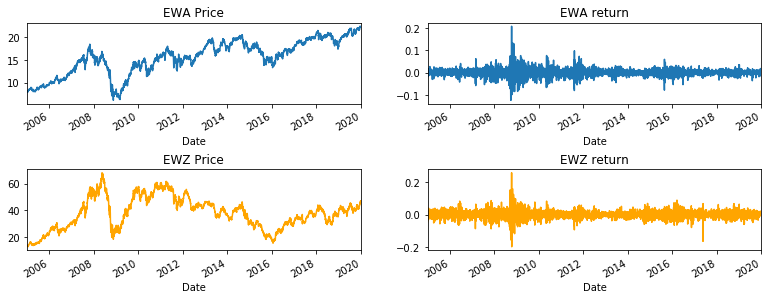

In [78]:
#開始畫圖
plt.subplots_adjust(top=1.5, bottom=0, left=0.3, right=2, hspace=0.8, wspace=0.2)
plt.subplot(3,2,1)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWA Price")
data[tickers[0]].plot()
plt.subplot(3,2,2)
plt.title("EWA return")
returns[tickers[0]].plot()
# color="m"
plt.subplot(3,2,3)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWZ Price")
data[tickers[1]].plot(color="orange")
plt.subplot(3,2,4)
plt.title("EWZ return")
returns[tickers[1]].plot(color="orange")

<b> 2. Portfolio Return比較

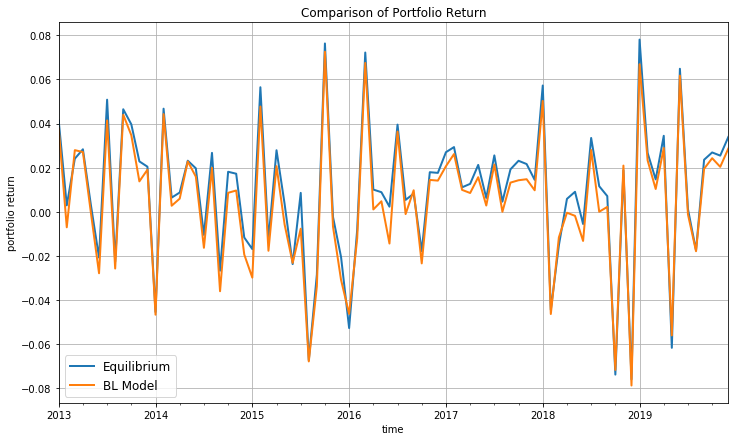

Equilibrium total return: 0.11564686045908946
BL Model total return: 0.05848513688520006


In [79]:
plt.figure(figsize=(12,7))

comparison_ret["Equilibrium"].plot(linewidth=2)
comparison_ret["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio return')
plt.title('Comparison of Portfolio Return')
plt.show()

print("Equilibrium total return:",eq_ret)
print("BL Model total return:", bl_ret)

<b> 3. Portfolio Volatility 比較

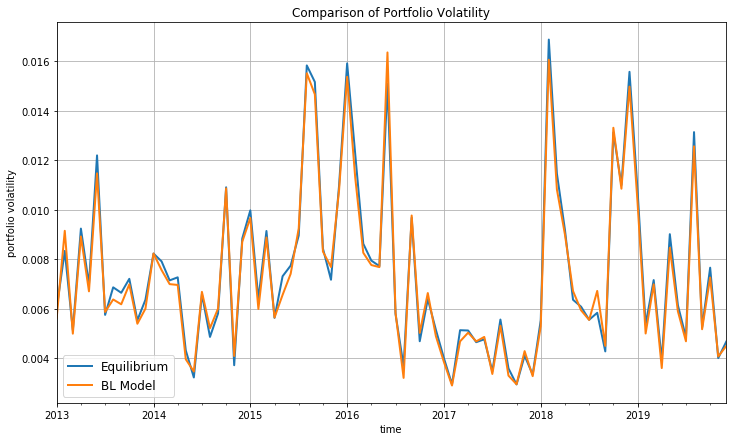

Equilibrium volatility: 0.02049449035412763
BL Model volatility: 0.019936636273552626


In [80]:
plt.figure(figsize=(12,7))

comparison_vol["Equilibrium"].plot(linewidth=2)
comparison_vol["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Volatility')
plt.show()

print("Equilibrium volatility:", eq_vol)
print("BL Model volatility:", bl_vol)

<b> 4. Portfolio Sharpe Ratio比較

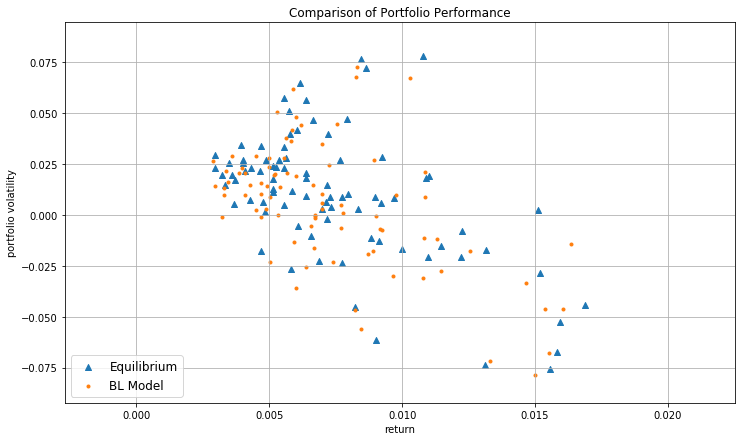

Equilibrium Sharpe: 5.642826850573425
BL Model Sharpe: 2.9335508800340997


In [81]:
plt.figure(figsize=(12,7))

plt.scatter(comparison_vol["Equilibrium"], comparison_ret["Equilibrium"], label="Equilibrium",marker='^')
plt.scatter(comparison_vol["BL Model"], comparison_ret["BL Model"], label="BL Model",marker='.')

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('return')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Performance')
plt.show()

print("Equilibrium Sharpe:", eq_ret/eq_vol)
print("BL Model Sharpe:", bl_ret/bl_vol)